#파이썬 추천 시스템 패키지 다운로드

In [1]:
!pip install surprise

     |████████████████████████████████| 11.8MB 317kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617603 sha256=323581f6c81d4bc4e743e1bbf7f59ee80610c43f97701f30dd1488cc52b2fa5a
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [2]:
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split
import pandas as pd
from surprise import Reader, Dataset #데이터프레임을 서프라이즈에서 사용하는 데이터타입으로 변환하기 위해서

#데이터 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filepath = '/content/drive/MyDrive/데이터마이닝/LAB6/temp_dataset/temp_ratings.csv'
ratings = pd.read_csv(filepath)

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,37438,1020,3.0,1047069348
1,113448,32,4.0,1271679905
2,52106,377,4.0,995749037
3,159710,10,3.0,856352560
4,45095,296,5.0,834960212


In [6]:
# 평점 최소값, 최대값 확인
ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userId,10000.0,8.129552e+04,4.674119e+04,23.0,40335.0,80954.0,1.217122e+05,1.625410e+05
movieId,10000.0,4.245521e+02,2.780821e+02,1.0,204.0,376.0,5.950000e+02,1.022000e+03
rating,10000.0,3.555500e+00,1.063688e+00,0.5,3.0,4.0,4.000000e+00,5.000000e+00
timestamp,10000.0,1.059402e+09,2.191815e+08,823514000.0,851103115.0,985605355.5,1.197353e+09,1.574027e+09


In [7]:
reader = Reader(rating_scale=(0.5, 5.0)) #(min, max)

#ratings DataFrame에서 컬럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 함
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [8]:
data

#SVD 추천 알고리즘 구현

In [9]:
trainset, testset = train_test_split(data, test_size=.25, random_state=1234)

In [10]:
algo = SVD(n_factors=50, biased=True, random_state=0)
algo.fit(trainset)

In [11]:
predictions = algo.test(testset)

In [12]:
predictions[:5]

[Prediction(uid=139585, iid=338, r_ui=2.5, est=3.5363564467006383, details={'was_impossible': False}),
 Prediction(uid=81181, iid=48, r_ui=2.0, est=3.4480080097660255, details={'was_impossible': False}),
 Prediction(uid=112175, iid=261, r_ui=4.0, est=3.807584698535285, details={'was_impossible': False}),
 Prediction(uid=38584, iid=480, r_ui=3.0, est=3.634299601094103, details={'was_impossible': False}),
 Prediction(uid=108414, iid=260, r_ui=4.5, est=4.053956499933353, details={'was_impossible': False})]

In [13]:
#RMSE (Root Mean Square Error)
#MSE (Mean Absolute Error)
accuracy.rmse(predictions)
accuracy.mse(predictions)

RMSE: 0.9773
MSE: 0.9552


0.9551508952190411

#교차 검증

In [14]:
from surprise.model_selection import cross_validate
cross_validate(algo, data, measures=['RMSE', 'MSE'], cv=5, verbose=True)

Evaluating RMSE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9466  1.0129  0.9881  0.9748  0.9729  0.9791  0.0216  
MSE (testset)     0.8961  1.0259  0.9764  0.9502  0.9466  0.9590  0.0423  
Fit time          0.33    0.33    0.36    0.34    0.34    0.34    0.01    
Test time         0.01    0.02    0.01    0.01    0.01    0.01    0.00    


{'fit_time': (0.3294236660003662,
  0.32892704010009766,
  0.3558802604675293,
  0.33527421951293945,
  0.3414340019226074),
 'test_mse': array([0.89611599, 1.02589872, 0.97635045, 0.95017693, 0.94656578]),
 'test_rmse': array([0.94663403, 1.01286659, 0.98810447, 0.97477019, 0.97291612]),
 'test_time': (0.011983871459960938,
  0.017384767532348633,
  0.012253046035766602,
  0.012185335159301758,
  0.012197732925415039)}

#하이퍼 파라미터 튜닝

In [15]:
from surprise.model_selection import GridSearchCV
#테스트할 파라미터들을 딕셔너리 형태로 지정
param_grid = {'n_epochs': [20,40,60], 'n_factors': [50,100,200]}

#CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse로 수행하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mse'], cv=3)
gs.fit(data)

In [16]:
#RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9774848202052464
{'n_epochs': 60, 'n_factors': 50}


#데이터 묘사하기

## ratings 분석하기


*   평점 평균은 약 3.5점이고, 4.0점 이상의 평점을 받은 영화가 절반이다.
*   사용자는 .5점 보다는 .0점을 주는 경향이 있다.



In [17]:
ratings = pd.read_csv('/content/drive/MyDrive/데이터마이닝/LAB6/temp_dataset/temp_ratings.csv')

In [18]:
ratings.head()

,userId,movieId,rating,timestamp
0,37438,1020,3.0,1047069348
1,113448,32,4.0,1271679905
2,52106,377,4.0,995749037
3,159710,10,3.0,856352560
4,45095,296,5.0,834960212


In [19]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     10000 non-null  int64  
 1   movieId    10000 non-null  int64  
 2   rating     10000 non-null  float64
 3   timestamp  10000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 312.6 KB


In [20]:
ratings['rating'].describe()

count    10000.000000
mean         3.555500
std          1.063688
min          0.500000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


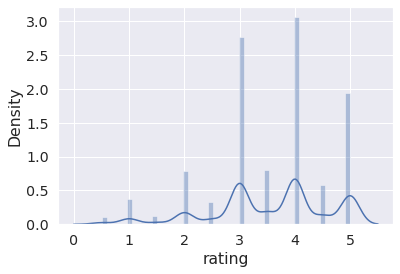

In [21]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.3)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

## movies 분석하기

In [22]:
movies = pd.read_csv('/content/drive/MyDrive/데이터마이닝/LAB6/temp_dataset/temp_movies.csv')

###Titles

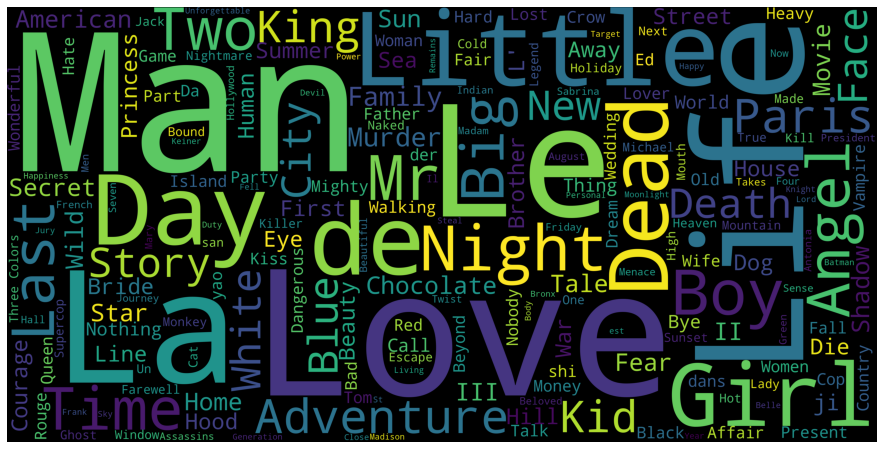

In [23]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

###Genres


*   가장 인기 있는 TOP5 장르:


  1.   드라마
  2.   코미디
  3.   로맨스
  4.   스릴러
  5.   액션







In [24]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 522],
 ['Comedy', 355],
 ['Romance', 199],
 ['Thriller', 173],
 ['Action', 136]]

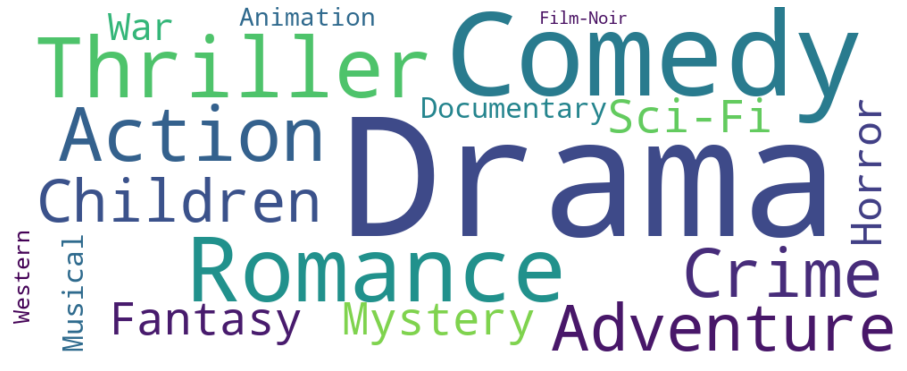

In [25]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()